In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import seaborn as sns
key='4f14d5e92fa70f090e8b848ca6d397b75a63d149'

In [ ]:
df = pdr.get_data_tiingo('NIVI',api_key='4f14d5e92fa70f090e8b848ca6d397b75a63d149')

In [ ]:
df.to_csv('APPL.csv')

In [4]:
df = pd.read_csv('APPL.csv')

In [5]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-11-11 00:00:00+00:00,116.110,117.42,115.21,116.37,45217971,26.889750,27.193131,26.681320,26.949963,180871884,0.0,1.0
1,AAPL,2015-11-12 00:00:00+00:00,115.720,116.82,115.65,116.26,32525579,26.799431,27.054178,26.783219,26.924489,130102316,0.0,1.0
2,AAPL,2015-11-13 00:00:00+00:00,112.340,115.57,112.27,115.20,45812403,26.016661,26.764692,26.000450,26.679005,183249612,0.0,1.0
3,AAPL,2015-11-16 00:00:00+00:00,114.175,114.24,111.00,111.38,38106701,26.441626,26.456680,25.706333,25.794336,152426804,0.0,1.0
4,AAPL,2015-11-17 00:00:00+00:00,113.690,115.05,113.32,114.92,27583101,26.329306,26.644266,26.243618,26.614160,110332404,0.0,1.0


In [53]:
df1 = df.reset_index()['close']

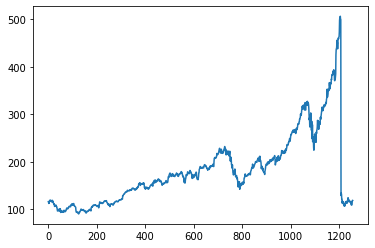

In [54]:
from matplotlib import pyplot as plt
plt.plot(df1)

In [8]:
df1

0       116.110
1       115.720
2       112.340
3       114.175
4       113.690
         ...   
1252    108.770
1253    110.440
1254    114.950
1255    119.030
1256    118.690
Name: close, Length: 1257, dtype: float64

In [9]:
 df1.shape

(1257,)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.06198437],
       [0.0610463 ],
       [0.05291642],
       ...,
       [0.05919423],
       [0.06900782],
       [0.06819002]])

In [13]:
df1.shape

(1257, 1)

In [14]:
## Spliting data set for training and testing

In [15]:
train_size = int(len(df1)*0.65)
test_size = len(df1)-train_size
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [16]:
print(len(train_data)) 
print(len(test_data))

817
440


In [17]:
# Convert array values into dataset matrix value
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)    

In [18]:
# reshape the array X=k,k+1,k+2,k+3,k+3, || Y=k+4 .... k+n(limited boundry)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [21]:
# Reshape inputs be [Samples, time_Step, features]
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [22]:
# Create LSTM model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error',optimizer='adam')          

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 445ms/step - loss: 0.0079 - val_loss: 0.0557
Epoch 2/100
12/12 [==============================] - 3s 280ms/step - loss: 0.0021 - val_loss: 0.0210
Epoch 3/100
12/12 [==============================] - 3s 279ms/step - loss: 6.4429e-04 - val_loss: 0.0206
Epoch 4/100
12/12 [==============================] - 3s 224ms/step - loss: 4.1138e-04 - val_loss: 0.0194
Epoch 5/100
12/12 [==============================] - 3s 226ms/step - loss: 3.5037e-04 - val_loss: 0.0190
Epoch 6/100
12/12 [==============================] - 3s 223ms/step - loss: 3.3517e-04 - val_loss: 0.0184
Epoch 7/100
12/12 [==============================] - 3s 284ms/step - loss: 3.1939e-04 - val_loss: 0.0180
Epoch 8/100
12/12 [==============================] - 3s 270ms/step - loss: 3.0841e-04 - val_loss: 0.0176
Epoch 9/100
12/12 [==============================] - 3s 276ms/step - loss: 2.9938e-04 - val_loss: 0.0173
Epoch 10/100
12/12 [==============================] - 3s 291ms/

In [27]:
# Prediction and Performance Metrics

In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [29]:
## Transform back to Original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
### RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

157.61804435610296

In [31]:
math.sqrt(mean_squared_error(y_test,test_predict))

289.288495124246

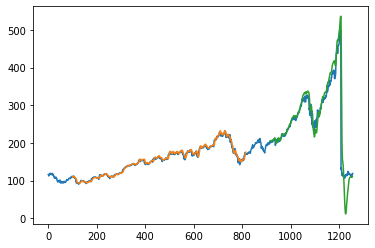

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

440

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
len(temp_input)

99

In [37]:
from numpy import array
lst_output=[]
n_steps=99
i=0
while(i<30):
    
    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.05564859]
100
1 day input [0.64589296 0.6643175  0.64875526 0.66025256 0.63328924 0.65289236
 0.66015634 0.65849669 0.65849669 0.68192423 0.6791341  0.70001203
 0.7039567  0.70556825 0.70131088 0.71651233 0.72293446 0.711365
 0.70948888 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029
 0.69488876 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179
 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105
 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708
 0.92064943 0.97929044 0.99360192 0.98366807 1.         0.98544799
 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0

7 day output [[0.06339872]]
8 day input [0.65849669 0.65849669 0.68192423 0.6791341  0.70001203 0.7039567
 0.70556825 0.70131088 0.71651233 0.72293446 0.711365   0.70948888
 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029 0.69488876
 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118
 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105 0.86999399
 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943
 0.97929044 0.99360192 0.98366807 1.         0.98544799 0.9834997
 0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.

17 day output [[0.0620898]]
18 day input [0.711365   0.70948888 0.72901984 0.71595911 0.71858088 0.67598316
 0.67377029 0.69488876 0.67990379 0.69710162 0.70816597 0.80505111
 0.83081179 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601
 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201
 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807 1.
 0.98544799 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761
 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837
 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161
 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278
 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233
 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376
 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476
 0.06316296 0.05017438 0.06008419 0.044546   0.04432952 0.04834636
 0.05919423 0.06900782 0.06819002 0.05564859 0.05979507 0.06230069
 0.06349924 0.06389758 0.0638

26 day output [[0.06515741]]
27 day input [0.69710162 0.70816597 0.80505111 0.83081179 0.83781118 0.8416356
 0.87858088 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632
 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044
 0.99360192 0.98366807 1.         0.98544799 0.9834997  0.09308479
 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477
 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113  0.04810583
 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721
 0.05921828 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243
 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677
 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239
 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419
 0.044546   0.04432952 0.04834636 0.05919423 0.06900782 0.06819002
 0.05564859 0.05979507 0.06230069 0.06349924 0.06389758 0.06388313
 0.0636805  0.06339872 0.06308663 0.06277017 0.06246993 0.06220581
 0.06199619 0.06185577

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
len(df1)

1257

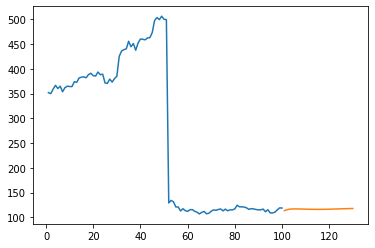

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

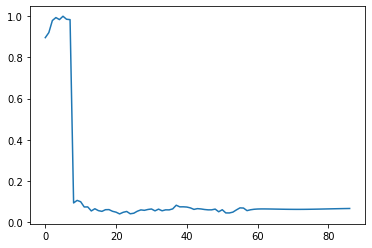

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [55]:
df3=scaler.inverse_transform(df3).tolist()

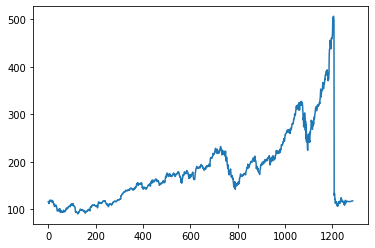

In [56]:
plt.plot(df3)